In [1]:
from Sample import Sample
from registration.register import FeatureExtractor
from preprocessing.preprocess import preprocess
import matplotlib.pyplot as plt

S = Sample("/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/Multimodal_Imaging_Daria/20211222_02-4074_BM")

roi = S.rois[0]

Possibly corrupted field Artist in Image IFD
Possibly corrupted field Artist in Image IFD
Possibly corrupted field Artist in Image IFD
Possibly corrupted field Artist in Image IFD
Possibly corrupted field Artist in Image IFD
Possibly corrupted field Artist in Image IFD
Possibly corrupted field Artist in Image IFD
Possibly corrupted field Artist in Image IFD
Possibly corrupted field Artist in Image IFD
Possibly corrupted field Artist in Image IFD
Possibly corrupted field Artist in Image IFD
Possibly corrupted field Artist in Image IFD


Found the following ROIs: [10, 7, 9, 8]


In [2]:
ppIF = preprocess(roi.if_nuc)
ppIMC = preprocess(roi.imc_nuc)

0 hot pixels found.
0 hot pixels found.


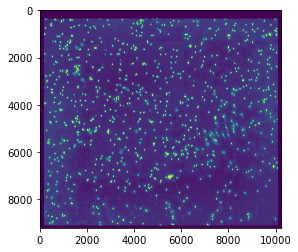

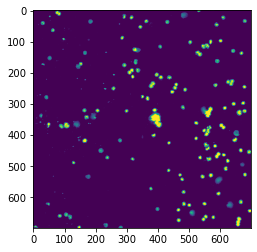

In [3]:
plt.imshow(ppIF)
plt.show()
plt.imshow(ppIMC)
plt.show()

In [3]:
ex = FeatureExtractor("sift")
ex(ppIF, ppIMC)
ex.match()
ex.estimate()
ex.warp()
im = ex.show_overlay()
plt.imsave("/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/Multimodal_Imaging_Daria/Temp_Daria/Registration/20211222_02-4074_BM_1.tiff", im)




Found 218 matches.
